<a href="https://colab.research.google.com/github/ardabyr/DataScience/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
files.upload()

data = pd.read_excel("ABBREV_with_CLASS.xlsx")

Saving ABBREV_with_CLASS.xlsx to ABBREV_with_CLASS.xlsx


In [ ]:

data.head()

,Unnamed: 0,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,CLASS
0,0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,...,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0,10
1,1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,...,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0,10
2,2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,...,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0,0
3,3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,...,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0,10
4,4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,...,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0,10


In [ ]:

data.isnull().sum()

Unnamed: 0              0
NDB_No                  0
Shrt_Desc               0
Water_(g)               1
Energ_Kcal              0
Protein_(g)             0
Lipid_Tot_(g)           0
Ash_(g)               325
Carbohydrt_(g)          0
Fiber_TD_(g)          594
Sugar_Tot_(g)        1832
Calcium_(mg)          348
Iron_(mg)             144
Magnesium_(mg)        739
Phosphorus_(mg)       579
Potassium_(mg)        426
Sodium_(mg)            83
Zinc_(mg)             706
Copper_mg)           1257
Manganese_(mg)       2160
Selenium_(µg)        1700
Vit_C_(mg)            818
Thiamin_(mg)          634
Riboflavin_(mg)       616
Niacin_(mg)           637
Panto_Acid_mg)       2242
Vit_B6_(mg)           905
Folate_Tot_(µg)      1261
Folic_Acid_(µg)      2039
Food_Folate_(µg)     1768
Folate_DFE_(µg)      2057
Choline_Tot_ (mg)    4016
Vit_B12_(µg)         1193
Vit_A_IU              711
Vit_A_RAE            1535
Retinol_(µg)         1806
Alpha_Carot_(µg)     3258
Beta_Carot_(µg)      3162
Beta_Crypt_(

In [ ]:

categorical_columns = data.select_dtypes(include=['object']).columns


data_without_categorical = data.drop(categorical_columns, axis=1)


In [ ]:

correlation_matrix = data_without_categorical.corr()
correlation_matrix

,Unnamed: 0,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2,Refuse_Pct,CLASS
Unnamed: 0,1.000000,0.940197,-0.222676,0.158950,0.111850,-0.018963,-0.024402,0.219480,0.020438,0.086679,...,-0.069929,-0.070324,-0.020607,-0.053618,-0.017436,-0.021946,-0.002427,0.022727,-0.103522,-0.024579
NDB_No,0.940197,1.000000,-0.187699,0.136262,0.072367,-0.009848,-0.010042,0.188716,0.020854,0.076999,...,-0.050755,-0.053839,-0.021483,-0.047979,0.008676,-0.031931,0.006346,0.003665,-0.116281,0.015043
Water_(g),-0.222676,-0.187699,1.000000,-0.900554,-0.103979,-0.489781,-0.281244,-0.773920,-0.394281,-0.506365,...,-0.075037,0.019965,-0.366525,-0.393146,-0.405290,0.058034,0.416632,0.157041,0.144993,-0.093075
Energ_Kcal,0.158950,0.136262,-0.900554,1.000000,0.112636,0.806677,0.114172,0.493028,0.204450,0.351313,...,0.104653,-0.025178,0.624444,0.691560,0.607855,0.014518,-0.410531,-0.107562,-0.086460,-0.033372
Protein_(g),0.111850,0.072367,-0.103979,0.112636,1.000000,0.062336,0.096528,-0.304295,-0.081145,-0.302557,...,0.028066,-0.092923,0.041520,0.069113,-0.063820,0.289766,-0.155797,0.175263,0.334061,-0.507164
Lipid_Tot_(g),-0.018963,-0.009848,-0.489781,0.806677,0.062336,1.000000,0.004215,-0.048594,-0.027475,-0.002315,...,0.105954,0.021452,0.773756,0.885439,0.714689,0.088131,-0.270102,-0.042174,0.002672,-0.172242
Ash_(g),-0.024402,-0.010042,-0.281244,0.114172,0.096528,0.004215,1.000000,0.161640,0.190849,0.029238,...,0.024230,0.073666,-0.018341,-0.001569,0.037666,-0.015401,-0.152911,-0.065905,-0.081078,0.038622
Carbohydrt_(g),0.219480,0.188716,-0.773920,0.493028,-0.304295,-0.048594,0.161640,1.000000,0.466204,0.678416,...,0.014963,-0.007462,-0.049231,-0.103738,0.054437,-0.222867,-0.234154,-0.221387,-0.278803,0.393876
Fiber_TD_(g),0.020438,0.020854,-0.394281,0.204450,-0.081145,-0.027475,0.190849,0.466204,1.000000,0.120625,...,-0.026354,0.205167,-0.083376,-0.034095,0.080907,-0.151183,-0.089702,-0.155149,-0.134426,0.203576
Sugar_Tot_(g),0.086679,0.076999,-0.506365,0.351313,-0.302557,-0.002315,0.029238,0.678416,0.120625,1.000000,...,0.114677,-0.029883,0.072529,-0.068110,-0.006012,-0.170956,-0.187867,-0.151911,-0.191131,0.356619


In [ ]:

data = pd.get_dummies(data)
data

,Unnamed: 0,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,GmWt_Desc2_7 pieces,"GmWt_Desc2_7 sausages, (drained contents from can, net wt 4 oz)","GmWt_Desc2_8 bottle, 8 fl oz",GmWt_Desc2_8 crayfish,GmWt_Desc2_8 fl oz,"GmWt_Desc2_8 fl oz, (1 serving)",GmWt_Desc2_8 oz,"GmWt_Desc2_8 pods, (3"" long)","GmWt_Desc2_8 wafers, mini wafers",GmWt_Desc2_9 sprigs
0,0,1001,15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,False,False,False,False,False,False,False,False,False,False
1,1,1002,16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,False,False,False,False,False,False,False,False,False,False
2,2,1003,0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,False,False,False,False,False,False,False,False,False,False
3,3,1004,42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,False,False,False,False,False,False,False,False,False,False
4,4,1005,41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,8785,83110,43.00,305,18.50,25.10,13.40,0.00,0.0,0.00,...,False,False,False,False,False,False,False,False,False,False
8786,8786,90240,70.25,111,20.54,0.84,2.97,5.41,0.0,0.00,...,False,False,False,False,False,False,False,False,False,False
8787,8787,90480,26.00,269,0.00,0.00,0.86,73.14,0.0,73.20,...,False,False,False,False,False,False,False,False,False,False
8788,8788,90560,79.20,90,16.10,1.40,1.30,2.00,0.0,0.00,...,False,False,False,False,False,False,False,False,False,False


In [ ]:

data = data.dropna()

In [ ]:

X = data.drop('Energ_Kcal', axis=1)
y = data['Energ_Kcal']

In [ ]:
X

,Unnamed: 0,NDB_No,Water_(g),Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,GmWt_Desc2_7 pieces,"GmWt_Desc2_7 sausages, (drained contents from can, net wt 4 oz)","GmWt_Desc2_8 bottle, 8 fl oz",GmWt_Desc2_8 crayfish,GmWt_Desc2_8 fl oz,"GmWt_Desc2_8 fl oz, (1 serving)",GmWt_Desc2_8 oz,"GmWt_Desc2_8 pods, (3"" long)","GmWt_Desc2_8 wafers, mini wafers",GmWt_Desc2_9 sprigs
0,0,1001,15.87,0.85,81.11,2.11,0.06,0.0,0.06,24.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1002,16.72,0.49,78.30,1.62,2.87,0.0,0.06,23.0,...,False,False,False,False,False,False,False,False,False,False
2,2,1003,0.24,0.28,99.48,0.00,0.00,0.0,0.00,4.0,...,False,False,False,False,False,False,False,False,False,False
3,3,1004,42.41,21.40,28.74,5.11,2.34,0.0,0.50,528.0,...,False,False,False,False,False,False,False,False,False,False
4,4,1005,41.11,23.24,29.68,3.18,2.79,0.0,0.51,674.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8775,8775,44061,4.20,5.30,2.40,9.90,78.20,6.1,0.70,126.0,...,False,False,False,False,False,False,False,False,False,False
8778,8778,44158,54.66,0.41,0.20,0.35,44.38,2.6,37.75,27.0,...,False,False,False,False,False,False,False,False,False,False
8779,8779,44203,28.24,0.08,0.01,0.07,71.60,0.0,24.53,2.0,...,False,False,False,False,False,False,False,False,False,False
8780,8780,44258,6.80,10.08,3.00,5.70,74.42,10.1,0.70,50.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.33      1.00      0.50         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.17      1.00      0.29         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

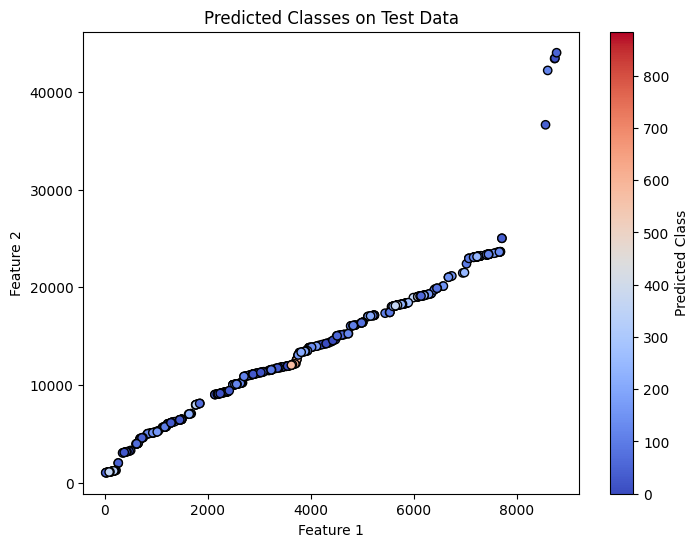

In [ ]:

import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='coolwarm', marker='o', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicted Classes on Test Data')
plt.colorbar(label='Predicted Class')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler1 = StandardScaler()
X_train_scaled1 = scaler1.fit_transform(X_train)
X_test_scaled1 = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
X_train_scaled2 = scaler2.fit_transform(X_train)
X_test_scaled2 = scaler2.transform(X_test)

In [ ]:
X_train_scaled1

array([[-1.68071325, -1.66742203, -0.31577016, ..., -0.04109975,
        -0.0237156 , -0.0237156 ],
       [ 1.22817603,  0.99471569,  0.19800088, ..., -0.04109975,
        -0.0237156 , -0.0237156 ],
       [-1.05403657, -0.95034166,  0.93309398, ..., -0.04109975,
        -0.0237156 , -0.0237156 ],
       ...,
       [-0.02864443, -0.03355798, -0.14278676, ..., -0.04109975,
        -0.0237156 , -0.0237156 ],
       [ 0.20148373,  0.09724107, -1.98172799, ..., -0.04109975,
        -0.0237156 , -0.0237156 ],
       [-0.398323  , -0.31724249,  1.13853334, ..., -0.04109975,
        -0.0237156 , -0.0237156 ]])

In [ ]:
X_train_scaled2

array([[2.96060123e-03, 6.01030999e-04, 4.84284284e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.67251196e-01, 4.65914607e-01, 6.33233233e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.67615577e-01, 1.25939111e-01, 8.46346346e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.37030289e-01, 2.86183222e-01, 5.34434434e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.97494876e-01, 3.09045517e-01, 1.30130130e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.39899795e-01, 2.36598165e-01, 9.05905906e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train_scaled1, y_train)

knn2 = KNeighborsClassifier()
knn2.fit(X_train_scaled2, y_train)


KNeighborsClassifier()

In [ ]:

accuracy_original = knn.score(X_test, y_test)
accuracy_standard = knn1.score(X_test_scaled1, y_test)
accuracy_minmax = knn2.score(X_test_scaled2, y_test)


print("Accuracy - Original Data:", accuracy_original)
print("Accuracy - StandardScaler:", accuracy_standard)
print("Accuracy - MinMaxScaler:", accuracy_minmax)


if accuracy_standard > accuracy_original:
    print("Модель, обученная на данных после стандартизации, показала лучшую точность.")
elif accuracy_minmax > accuracy_original:
    print("Модель, обученная на данных после нормализации, показала лучшую точность.")
else:
    print("Модель, обученная на исходных данных, показала лучшую точность.")


Accuracy - Original Data: 0.017977528089887642
Accuracy - StandardScaler: 0.017977528089887642
Accuracy - MinMaxScaler: 0.024719101123595506
Модель, обученная на данных после нормализации, показала лучшую точность.


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [5, 10, 15], 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled1, y_train)
best_params = grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
best_params

{'metric': 'euclidean', 'n_neighbors': 5}

- Модель, обученная на данных после стандартизации (StandardScaler), показала лучшую точность/производительность по сравнению с моделью, обученной на нормализованных данных (MinMaxScaler).


1. Оставление только одного из сильно коррелирующих признаков:
   
   - Результат: Точность модели после отбора признаков accuracy_correlation.
   - Обоснование: Признаки с высокой корреляцией могут вносить избыточность в данные, выбор одного из них позволяет устранить мультиколлинеарность и улучшить обобщающую способность модели.

2. Объединение групп связанных признаков:
   
   - Результат: Точность модели после объединения признаков accuracy_feature_grouping.
   - Обоснование: Группировка связанных признаков может уменьшить размерность данных, улучшить интерпретируемость модели и сократить время обучения.

3. Случайный отбор поднабора признаков:
   
   - Результат: Лучшая точность модели после случайного отбора accuracy_random_subset.
   - Обоснование: Случайный отбор признаков позволяет проверить различные комбинации и выявить наиболее важные для классификации признаки.

4. Использование методов уменьшения размерности (PCA):
   
   - Результат: Точность модели после применения PCA accuracy_pca.
   - Обоснование: Применение PCA может позволить сохранить информацию о данных, снизить размерность и улучшить обобщающую способность модели.

5. Свой вариант отбора и подготовки признаков:
   
   - Результат: Точность модели после применения собственного метода accuracy_custom.
   - Обоснование: Использование специфических для предметной области методов отбора признаков может привести к улучшению предсказательной силы модели.